# **PLOTS**
<hr>

## **Authors:**
- **Ladrera**, Raiken Lee
- **Tibon**, Hestia  

<hr>


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
import numpy as np

## **Bar Graph Plot**
<hr>

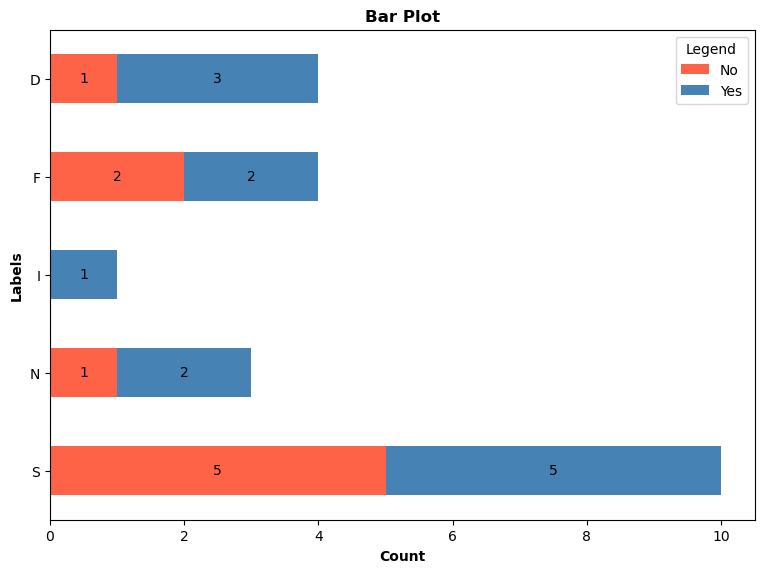

In [23]:
bar_df = pd.read_csv("bar_assignment.csv")
bar_counts = bar_df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)
bar_counts = bar_counts.rename(columns={0: 'No', 1: 'Yes'}).sort_index(ascending=False)
bar_counts = bar_counts[['No', 'Yes']]

fig = plt.figure(figsize=(20, 14))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
bars = bar_counts.plot(kind='barh', stacked=True, ax=ax1, color=['#FF6347', '#4682B4'])

for container in bars.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    bars.bar_label(container, labels=labels, label_type='center')

ax1.set_title('Bar Plot', fontweight='bold')
ax1.set_xlabel('Count', fontweight='bold')
ax1.set_ylabel('Labels', fontweight='bold')
ax1.legend(title='Legend', labels=['No', 'Yes'])
plt.show()


## **Sankey Diagram Plot**
<hr>

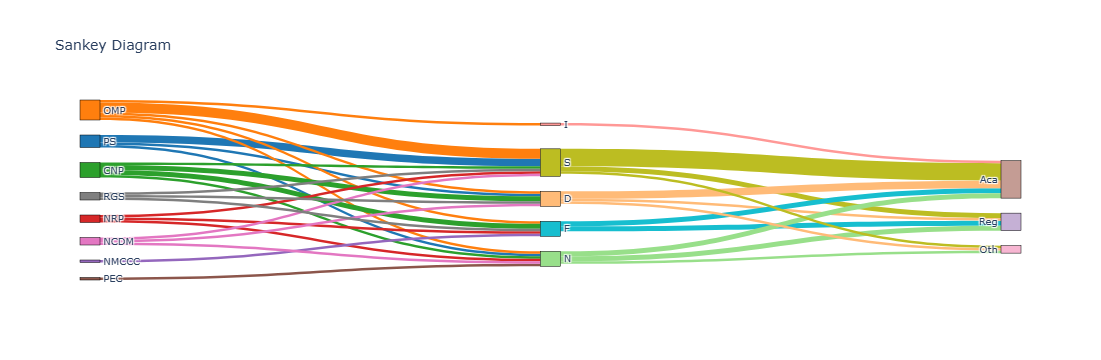

In [39]:
import pandas as pd
import plotly.graph_objects as go

sankey_df = pd.read_csv('sankey_assignment.csv')

df_prep = sankey_df.melt(id_vars=['LABEL'], var_name='source', value_name='value')
df_prep.rename(columns={'LABEL': 'target'}, inplace=True)
df_prep = df_prep[['source', 'target', 'value']]

# First Layer -> Second Layer
df_temp1 = df_prep[:40]

# Second Layer -> Last Layer
df_temp2 = df_prep[40:].copy()  # Copy to avoid SettingWithCopyWarning
df_temp2 = df_temp2[['target', 'source', 'value']]
df_temp2.rename(columns={'target': 'source', 'source': 'target'}, inplace=True)

# Combine layers
links = pd.concat([df_temp1, df_temp2], axis=0)

unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}

links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

links_dict = links.to_dict(orient='list')

# Define color palette for nodes
hex_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2"
]

node_colors = {node: hex_colors[i % len(hex_colors)] for i, node in enumerate(unique_source_target)}

fig = go.Figure(data=[go.Sankey(
   node = dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=unique_source_target,
        color=[node_colors[node] for node in unique_source_target],
   ),
   link = dict(
        source=links_dict['source'],
        target=links_dict['target'],
        value=links_dict['value'],
        color=[node_colors[unique_source_target[src]] for src in links_dict['source']]
   )
)])

fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()


## **Network Graph**
<hr>

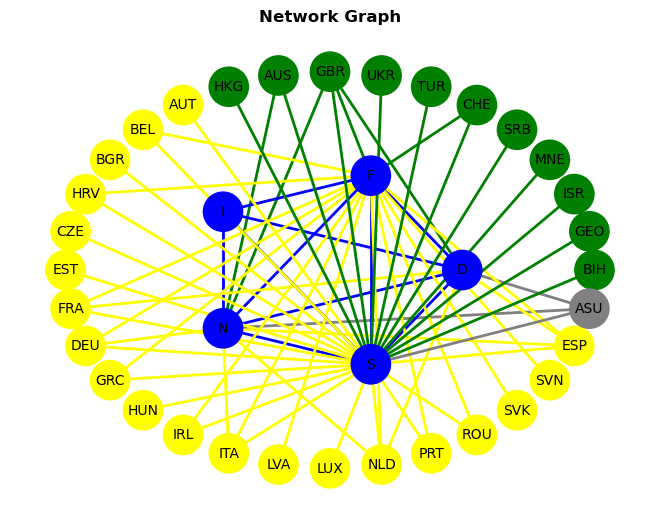

In [25]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = 'networks_assignment.csv'
data = pd.read_csv(csv_path)

# Create a new graph
G = nx.Graph()

# Add nodes with labels
nodes = data.columns[1:].tolist()
G.add_nodes_from(nodes)

# Add edges based on the CSV data with weights
for index, row in data.iterrows():
    node = row['LABELS']
    for target, value in row[1:].items():
        if value > 0:
            G.add_edge(node, target, weight=value)

# Define positions for the pentagon nodes
pentagon_nodes = ['D', 'F', 'I', 'N', 'S']
angle = np.linspace(0, 2 * np.pi, len(pentagon_nodes), endpoint=False)
pos = {node: (np.cos(a), np.sin(a)) for node, a in zip(pentagon_nodes, angle)}

# Define positions for the outer nodes (yellow and green)
outer_radius = 2
yellow_nodes = [node for node in nodes if node in [
    'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']]
green_nodes = [node for node in nodes if node in [
    'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']]
gray_nodes = [node for node in nodes if node in ['ASU']]

# Combine all outer nodes
outer_nodes = green_nodes + yellow_nodes + gray_nodes

# Calculate angles for outer nodes to space them equally
outer_angle = np.linspace(0, 2 * np.pi, len(outer_nodes), endpoint=False)

# Update positions for outer nodes
pos.update({node: (outer_radius * np.cos(a), outer_radius * np.sin(a)) for node, a in zip(outer_nodes, outer_angle)})

# Ensure all nodes have positions
for node in nodes:
    if node not in pos:
        pos[node] = (0, 0)  # Default position if not assigned

# Define node colors
color_map = {
    'D': 'blue', 'F': 'blue', 'I': 'blue', 'N': 'blue', 'S': 'blue',
    'BIH': 'green', 'GEO': 'green', 'ISR': 'green', 'MNE': 'green', 'SRB': 'green', 'CHE': 'green', 'TUR': 'green', 'UKR': 'green', 'GBR': 'green', 'AUS': 'green', 'HKG': 'green', 'USA': 'green',
    'AUT': 'yellow', 'BEL': 'yellow', 'BGR': 'yellow', 'HRV': 'yellow', 'CZE': 'yellow', 'EST': 'yellow', 'FRA': 'yellow', 'DEU': 'yellow', 'GRC': 'yellow', 'HUN': 'yellow', 'IRL': 'yellow', 'ITA': 'yellow', 'LVA': 'yellow', 'LUX': 'yellow', 'NLD': 'yellow', 'PRT': 'yellow', 'ROU': 'yellow', 'SVK': 'yellow', 'SVN': 'yellow', 'ESP': 'yellow',
    'ASU': 'gray'
}
node_colors = [color_map.get(node, 'gray') for node in G.nodes()]

# Define edges and nodes to display
display_nodes = pentagon_nodes + outer_nodes
display_edges = [(u, v) for u, v, d in G.edges(data=True) if u in display_nodes and v in display_nodes]

# Create a subgraph for display
H = G.edge_subgraph(display_edges).copy()

# Filter positions and colors for the subgraph
subgraph_pos = {node: pos[node] for node in H.nodes()}
subgraph_colors = [color_map[node] for node in H.nodes()]

# Define edge colors based on the nodes they connect
edge_colors = []
for u, v in H.edges():
    if v in yellow_nodes:
        edge_colors.append('yellow')
    elif v in green_nodes:
        edge_colors.append('green')
    elif v in gray_nodes:
        edge_colors.append('gray')
    else:
        edge_colors.append('blue')

# Draw the graph without edge weights
plt.figure()
nx.draw(H, subgraph_pos, with_labels=True, node_color=subgraph_colors, node_size=800, font_size=10, edge_color=edge_colors, width=2)
plt.title('Network Graph', fontweight='bold')
plt.show()